In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.datasets import load_iris

In [95]:
class MyDummyClassifier(BaseEstimator):
    def __init__(self, method='Normal', threshold = 0.5):
        self.method = method
        self.threshold = threshold

    def fit(self, X, y=None):
        pass

    def predict(self, X):
        if self.method == 'normal':
            return np.random.normal(size = X.shape[0]) > self.threshold
        elif self.method == 'Bernoulli':
            return np.random.binomial(1, self.threshold, size = X.shape[0])
        else:
            return np.random.uniform(size = X.shape[0]) > self.threshold

In [96]:
X = np.random.normal(size = 1000)
p_arr = np.arange(0, 1.1, 0.1)

In [97]:
normal_arr = []
bernoulli_arr = []
uniform_arr = []

for p in p_arr:
    normal = MyDummyClassifier(method='normal', threshold=p)
    bernoulli = MyDummyClassifier(method='Bernoulli', threshold=p)
    uniform = MyDummyClassifier(method='uniform', threshold=p)

    normal_pred = np.mean(normal.predict(X))
    bernoulli_pred = np.mean(bernoulli.predict(X))
    uniform_pred = np.mean(uniform.predict(X))

    normal_arr.append(normal_pred)
    bernoulli_arr.append(bernoulli_pred)
    uniform_arr.append(uniform_pred)

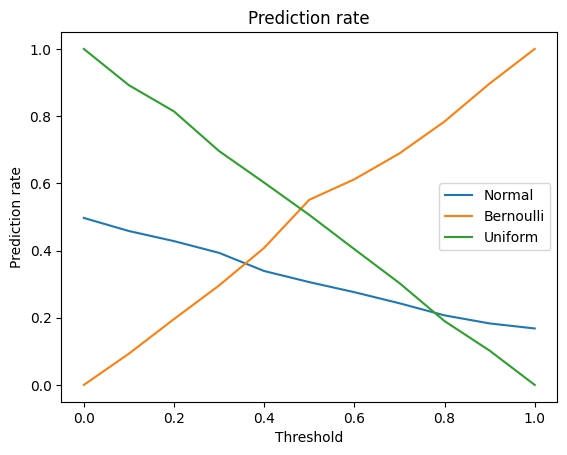

In [98]:
plt.plot(p_arr, normal_arr, label='Normal')
plt.plot(p_arr, bernoulli_arr, label='Bernoulli')
plt.plot(p_arr, uniform_arr, label='Uniform')
plt.title('Prediction rate')
plt.xlabel('Threshold')
plt.ylabel('Prediction rate')
plt.legend()
plt.show()

In [99]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df[df['target'] != 2]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [100]:
precision_arr = []
recall_arr = []
f1_arr = []

for p in p_arr:
    normal = MyDummyClassifier(method='normal', threshold=p)
    bernoulli = MyDummyClassifier(method='Bernoulli', threshold=p)
    uniform = MyDummyClassifier(method='uniform', threshold=p)

    normal_pred = normal.predict(df.drop('target', axis=1))
    bernoulli_pred = bernoulli.predict(df.drop('target', axis=1))
    uniform_pred = uniform.predict(df.drop('target', axis=1))

    normal_tp = np.sum((normal_pred == 1) & (df['target'] == 1))
    normal_fp = np.sum((normal_pred == 1) & (df['target'] == 0))
    normal_fn = np.sum((normal_pred == 0) & (df['target'] == 1))
    normal_precision = normal_tp / (normal_tp + normal_fp)
    normal_recall = normal_tp / (normal_tp + normal_fn)
    normal_f1 = 2 * normal_precision * normal_recall / (normal_precision + normal_recall)

    bernoulli_tp = np.sum((bernoulli_pred == 1) & (df['target'] == 1))
    bernoulli_fp = np.sum((bernoulli_pred == 1) & (df['target'] == 0))
    bernoulli_fn = np.sum((bernoulli_pred == 0) & (df['target'] == 1))
    bernoulli_precision = bernoulli_tp / (bernoulli_tp + bernoulli_fp)
    bernoulli_recall = bernoulli_tp / (bernoulli_tp + bernoulli_fn)
    bernoulli_f1 = 2 * bernoulli_precision * bernoulli_recall / (bernoulli_precision + bernoulli_recall)

    uniform_tp = np.sum((uniform_pred == 1) & (df['target'] == 1))
    uniform_fp = np.sum((uniform_pred == 1) & (df['target'] == 0))
    uniform_fn = np.sum((uniform_pred == 0) & (df['target'] == 1))
    uniform_precision = uniform_tp / (uniform_tp + uniform_fp)
    uniform_recall = uniform_tp / (uniform_tp + uniform_fn)
    uniform_f1 = 2 * uniform_precision * uniform_recall / (uniform_precision + uniform_recall)

    precision_arr.append([normal_precision, bernoulli_precision, uniform_precision])
    recall_arr.append([normal_recall, bernoulli_recall, uniform_recall])
    f1_arr.append([normal_f1, bernoulli_f1, uniform_f1])

precision_arr = np.array(precision_arr)
recall_arr = np.array(recall_arr)
f1_arr = np.array(f1_arr)

C:\Users\anike\AppData\Local\Temp\ipykernel_15140\808612818.py:24: RuntimeWarning: invalid value encountered in scalar divide
  bernoulli_precision = bernoulli_tp / (bernoulli_tp + bernoulli_fp)
C:\Users\anike\AppData\Local\Temp\ipykernel_15140\808612818.py:31: RuntimeWarning: invalid value encountered in scalar divide
  uniform_precision = uniform_tp / (uniform_tp + uniform_fp)


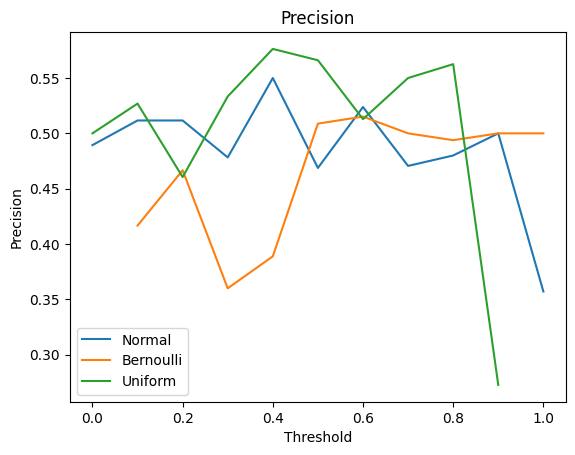

In [101]:
plt.plot(p_arr, precision_arr[:, 0], label='Normal')
plt.plot(p_arr, precision_arr[:, 1], label='Bernoulli')
plt.plot(p_arr, precision_arr[:, 2], label='Uniform')
plt.title('Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.legend()
plt.show()

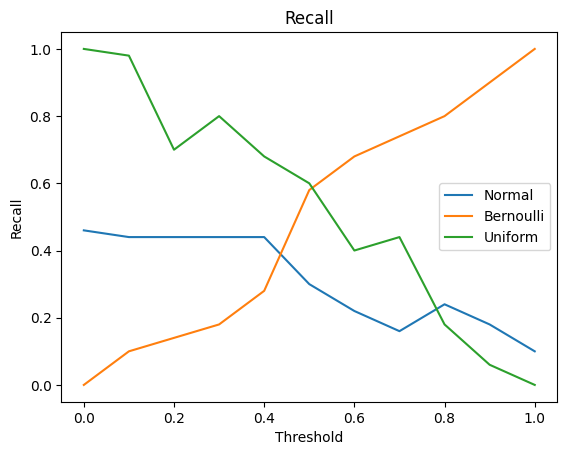

In [102]:
plt.plot(p_arr, recall_arr[:, 0], label='Normal')
plt.plot(p_arr, recall_arr[:, 1], label='Bernoulli')
plt.plot(p_arr, recall_arr[:, 2], label='Uniform')
plt.title('Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.legend()
plt.show()

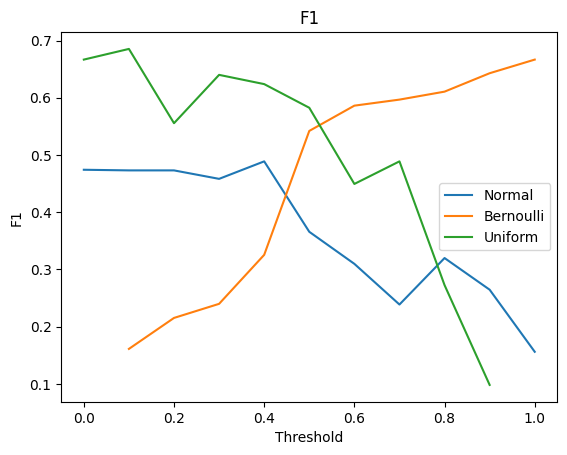

In [103]:
plt.plot(p_arr, f1_arr[:, 0], label='Normal')
plt.plot(p_arr, f1_arr[:, 1], label='Bernoulli')
plt.plot(p_arr, f1_arr[:, 2], label='Uniform')
plt.title('F1')
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.legend()
plt.show()